# Ejercicio de inteligencia artificial 

In [11]:
from scipy.optimize import fsolve
from sympy import *
x = Symbol('x')
sol=solve(0.07031*x*x - 72.9*x + 2.038e+04 - 100000, x)
maxi=max(sol)/ (7 * 24)
print(maxi) 
print(sol)

10.1317216486149
[-665.292371656529, 1702.12923696730]


In [12]:
import scipy as sp
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print(data[:10])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


In [13]:
x = data[:,0]
y = data[:,1]
#print(x)
print(x.shape)


(743,)


Creando los arreglos x y y para realizar la regresión exponencial

In [14]:
x = data[:,0]
#print(y)
print(y.shape)

(743,)


Eliminando los valores para los cuales hay entradas inválidas

In [15]:
print("Number of invalid entries:", sp.sum(sp.isnan(y)))
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]
#print(y)
print(y.shape)

Number of invalid entries: 8
(735,)


In [16]:
import matplotlib.pyplot as plt #Allows to create charts
%matplotlib inline 

def plot_data(x, y, s):
    plt.scatter(x, y, s=s)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])
    plt.autoscale(tight=True)
    plt.grid()
    plt.show()

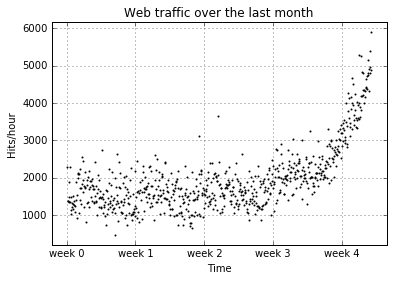

In [17]:
plot_data(x, y, s=1)

Se realiza la regresión no lineal aproximando los datos a una función exponencial de la forma f(x)=ae^(bx)+c

In [18]:
import numpy as np
from scipy.optimize import curve_fit
def func(x, a, b, c):
     return a * np.exp(-b * x) + c

In [19]:
popt, pcov = curve_fit(func, x, y,p0=(1, 1e-6, 1))


In [20]:
print(popt)

[  6.09563500e-01  -1.16689748e-02   1.54580090e+03]


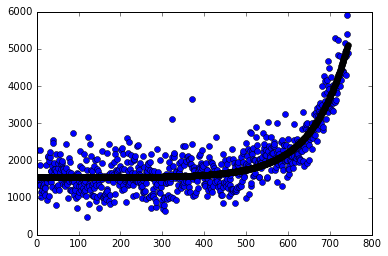

In [21]:
import matplotlib.pyplot as plt
yy = func(x,   *popt)
#plot_data(x, y, s=1)
#plot_data(x, yy,s=1)
plt.plot(x, y, 'bo', x, yy, 'ko')


Ahora, teniendo la función que se ajusta a los datos, se halla la semana donde se pronostican 1000000 visitas/hora:

In [22]:

from scipy.optimize import fsolve
from sympy import *
#import numpy as np
a=popt[0]
b=popt[1]
c=popt[2]
func2 = lambda xs :a * np.exp(-b * xs) + c-100000
func3 =lambda xs :a * np.exp(-b * xs) + c
#sol=fsolve(a * np.exp(-b * xs) + c-100000, xs)
sol = fsolve(func2, 1000)
sol1=sol/(24*7)

La semana en donde se pronostican 100000 visitas/hora es:

In [23]:
print(sol1[0])

6.11734019271


Verificando la solución:

In [238]:
print(func3(sol))

[ 100000.]
